In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Define the true function y = x^2
def true_function(x):
    return x**2

# Generate training data
np.random.seed(42)
X_train = np.random.uniform(low=-3, high=3, size=(100, 1))
y_train = true_function(X_train)

In [23]:
# Define the MLP architecture
input_size = 1
hidden_size = 10
output_size = 1

# Initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size)
biases_input_hidden = np.zeros((1, hidden_size))

weights_hidden_output = np.random.rand(hidden_size, output_size)
biases_hidden_output = np.zeros((1, output_size))

In [24]:
# Set learning rate and number of epochs
learning_rate = 0.01
epochs = 1000

# Training the MLP
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + biases_input_hidden
    hidden_layer_output = np.maximum(0, hidden_layer_input)  # ReLU activation
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_hidden_output
    predicted_output = output_layer_input

    # Compute loss (MSE)
    loss = np.mean((predicted_output - y_train)**2)

    # Backward pass
    output_error = 2 * (predicted_output - y_train) / len(X_train)
    hidden_error = np.dot(output_error, weights_hidden_output.T)
    hidden_error[hidden_layer_output <= 0] = 0  # ReLU derivative

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error)
    biases_hidden_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, hidden_error)
    biases_input_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 10.53971153232603
Epoch 10, Loss: 9.487297932547381
Epoch 20, Loss: 8.690768501403785
Epoch 30, Loss: 8.058640921149909
Epoch 40, Loss: 7.560090801787386
Epoch 50, Loss: 7.1628446966501675
Epoch 60, Loss: 6.845951804126498
Epoch 70, Loss: 6.597959460301286
Epoch 80, Loss: 6.399039102636409
Epoch 90, Loss: 6.2383033116586
Epoch 100, Loss: 6.107163258935585
Epoch 110, Loss: 5.9971346072987135
Epoch 120, Loss: 5.903681711834187
Epoch 130, Loss: 5.824275491875849
Epoch 140, Loss: 5.759048855617521
Epoch 150, Loss: 5.703438970035743
Epoch 160, Loss: 5.654835690847836
Epoch 170, Loss: 5.611673846081846
Epoch 180, Loss: 5.575003868818186
Epoch 190, Loss: 5.541460866970524
Epoch 200, Loss: 5.5102728099431575
Epoch 210, Loss: 5.48163156249983
Epoch 220, Loss: 5.45463198512102
Epoch 230, Loss: 5.429486004251845
Epoch 240, Loss: 5.404790454689781
Epoch 250, Loss: 5.380225818464413
Epoch 260, Loss: 5.355753665993965
Epoch 270, Loss: 5.331526194116913
Epoch 280, Loss: 5.3070320832437

In [25]:
# Generate test data
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)

# Test the trained model
hidden_layer_input = np.dot(X_test, weights_input_hidden) + biases_input_hidden
hidden_layer_output = np.maximum(0, hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_hidden_output
predicted_output = output_layer_input.flatten()

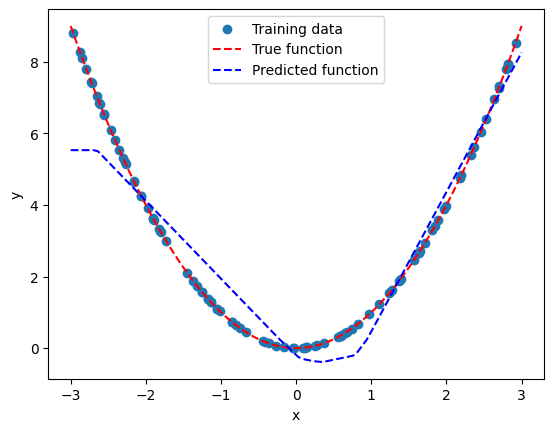

In [26]:
# Plot the results
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_test, true_function(X_test), label='True function', linestyle='--', color='red')
plt.plot(X_test, predicted_output, label='Predicted function', linestyle='--', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()